# Table of Contents
#  Project Report: Insurance charge prediction
1. [Project Overview](#1-project-overview)
2. [Data Collection and exploration ](#2-data-collection-exploration)
3. [Data Cleaning ](#3-Data-Cleaning: )
4. [Feature Engineering](#4-feature-engineering)
5. [Exploratory-Data-Analysis ](#5-Exploratory-Data-Analysis-(EDA))
6. [Model Training ](#6-model-training)
7. [Model Evaluation & Results](#7-model-evaluation-results)
8. [Business Recommendations](#8-business-recommendations)

# 1-project-overview

## 1.Problem statement : 
### - Most health insurance companies aim to set fair and accurate prices for their clients based on factors such as age, health status, and other personal attributes. Their goal is to avoid setting premiums too low, which could lead to financial losses, while also avoiding premiums that are too high, which could drive clients away.
### - The objective of this project is to train a machine learning model that predicts the insurance charges for a client using their demographic and health-related information.

## 2. The Dataset :
### -The dataset contains 1338 customers and with 7 features , including : 
* **age:** The age of customers.
* **sex:** Male , Female.
* **bmi:** the body max index.
* **children:** Number of childer for each customer.
* **smoker:** Yes , No.
* **region:** Southeast , Northwest
* **charges:** `charges` , target variable

# 2-data-collection-exploration

In [1]:
import pandas as pd
df=pd.read_csv("insurance.csv")

print(df.head())
print(df.info()) 


    age     sex     bmi  children smoker     region       charges
0  19.0  female  27.900       0.0    yes  southwest     16884.924
1  18.0    male  33.770       1.0     no  Southeast     1725.5523
2  28.0    male  33.000       3.0     no  southeast     $4449.462
3  33.0    male  22.705       0.0     no  northwest  $21984.47061
4  32.0    male  28.880       0.0     no  northwest    $3866.8552
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB
None


In [2]:
print(df.isna().sum())

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64


In [3]:
print(df.describe())

               age          bmi     children
count  1272.000000  1272.000000  1272.000000
mean     35.214623    30.560550     0.948899
std      22.478251     6.095573     1.303532
min     -64.000000    15.960000    -4.000000
25%      24.750000    26.180000     0.000000
50%      38.000000    30.210000     1.000000
75%      51.000000    34.485000     2.000000
max      64.000000    53.130000     5.000000


In [4]:
print(df["sex"].value_counts())
print("/****************/")
print(df["smoker"].value_counts())
print("/**********************/")
print(df["region"].value_counts())

sex
male      517
female    503
M          64
man        64
F          62
woman      62
Name: count, dtype: int64
/****************/
smoker
no     1013
yes     259
Name: count, dtype: int64
/**********************/
region
Southeast    172
southeast    170
southwest    164
Northwest    161
Northeast    155
northeast    153
northwest    149
Southwest    148
Name: count, dtype: int64


## 📋 Data Audit & Initial Findings
### 1- Data Integrity: The dataset was successfully loaded. However, initial inspection revealed several data quality issues that required immediate attention before analysis could proceed.

### 2- Missing Values: Identified missing values in key columns. While the percentage of missing data was low (<5%), simply dropping rows without investigation was deemed risky.

### Data Anomalies:

#### 1- Negative Values: Found impossible negative values in the age and children columns (e.g., -64, -4). This likely indicates a data entry error where the negative sign was accidentally included.

#### 2- String Inconsistencies: Categorical variables like sex and region contained inconsistent formatting (e.g., "male", "M", "man" all representing the same category).

#### 3- Data Types: The charges column was imported as an object (string) due to the presence of the $ currency symbol, preventing numerical analysis.

# 3-Data Cleaning: 

In [5]:
df["region"]=df["region"].str.lower().str.capitalize()

df["region"].value_counts()



region
Southeast    342
Southwest    312
Northwest    310
Northeast    308
Name: count, dtype: int64

In [6]:
sex_corrections = {
    'M': 'male', 'man': 'male', 
    'F': 'female', 'woman': 'female', 'womale': 'female'
}
df['sex'] = df['sex'].replace(sex_corrections)




## Dealing with missing values : 

In [7]:
#threshold
Threshold=len(df) *0.05
#Dropping missing values

cols_to_drop=df.columns[df.isna().sum()<=Threshold]

df.dropna(subset=cols_to_drop,inplace=True)

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Dealing with outliers : 

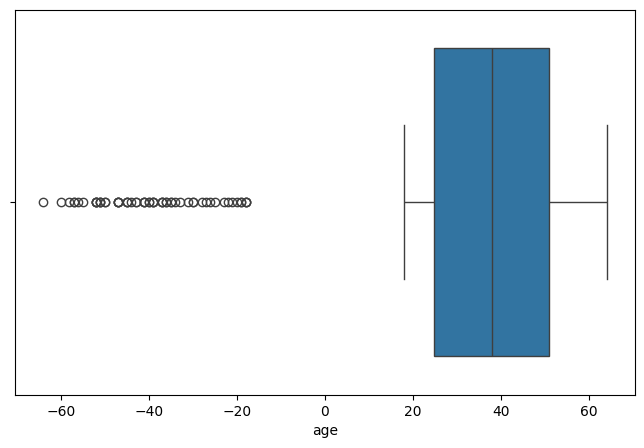

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="age")
plt.show()

In [9]:
df.loc[df["age"]<0]

,age,sex,bmi,children,smoker,region,charges
5,-31.0,female,25.740,0.0,no,Southeast,$3756.6216
14,-27.0,male,42.130,0.0,yes,Southeast,39611.7577
17,-23.0,male,23.845,0.0,no,Northeast,$2395.17155
79,-41.0,female,32.965,-0.0,no,Northwest,$6571.02435
93,-35.0,male,34.770,2.0,no,Northwest,$5729.0053
179,-41.0,female,33.155,3.0,no,Northeast,$8538.28845
196,-39.0,female,32.800,0.0,no,Southwest,$5649.715
205,-28.0,female,28.880,1.0,no,Northeast,$4337.7352
211,-40.0,male,30.875,4.0,no,Northwest,$8162.71625
292,-25.0,male,45.540,2.0,yes,Southeast,$42112.2356


In [10]:
df["age"]=df["age"].abs()


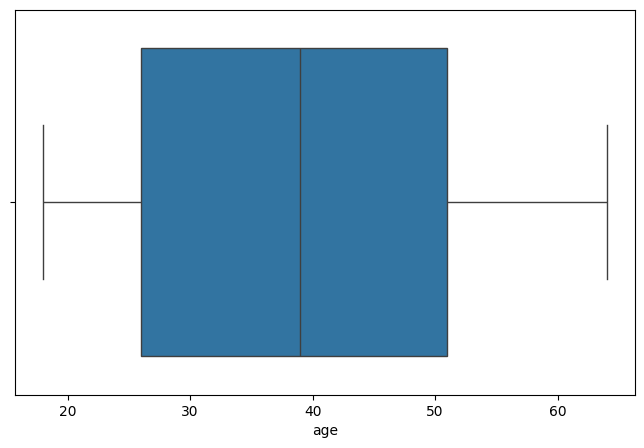

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="age")
plt.show()

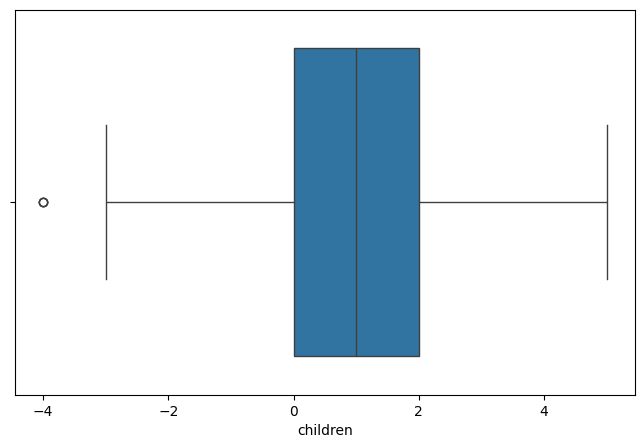

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="children")
plt.show()

In [13]:
df['children'] = df['children'].abs()

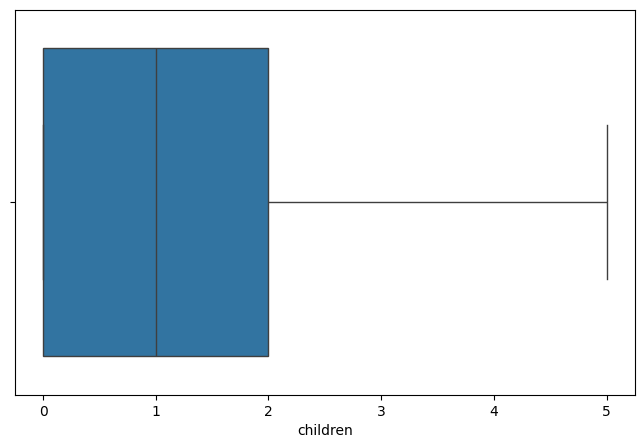

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="children")
plt.show()

In [15]:
df["charges"]=df["charges"].str.replace("$",'')
df["charges"]=df["charges"].astype(float)

In [16]:
print(df.head())
print(df.info())

    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900       0.0    yes  Southwest  16884.92400
1  18.0    male  33.770       1.0     no  Southeast   1725.55230
2  28.0    male  33.000       3.0     no  Southeast   4449.46200
3  33.0    male  22.705       0.0     no  Northwest  21984.47061
4  32.0    male  28.880       0.0     no  Northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: float64(4), object(3)
memory usage: 75.5+ KB
None


## 🧹 Data Cleaning Summary & Rationale

* **Handling Anomalies:**  Instead of deleting rows with negative ages and children counts (which would lead to data loss), I applied an absolute value transformation. This preserved the valid magnitude of the data while correcting the sign error.

* **Standardizing Categories:**  I created a mapping dictionary to unify inconsistent labels (e.g., mapping 'M', 'man' -> 'Male'). This ensures that the model treats all variations of a category as a single entity.

* **Correcting Data Types:**  I stripped the $ symbol from the charges column and converted it to a float data type. This unlocked the ability to perform statistical analysis and modeling on the target variable.

* **Addressing Missing Data:**  Since the missing data constituted less than 5% of the total dataset and appeared to be random, I opted to drop these rows to maintain dataset purity without introducing potential bias from imputation.

# 4-feature-engineering

In [17]:
df["have_children"]=df["children"].apply(lambda x : 'Yes' if x > 0 else 'No')

In [18]:
def categorize_bmi(bmi):
    if bmi >= 30:
        return 'Obesity'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Healthy weight'

df['bmi_categorie'] = df['bmi'].apply(categorize_bmi)

In [19]:
def categorize_charges(charges):
    if charges < 10000:
        return 'Low'
    elif charges < 20000:
        return 'Medium'
    else:
        return 'High'
    
df["charges_categories"]=df["charges"].apply(categorize_charges)

In [20]:
def age_categories(age):
    if age<=29:
        return "20s"
    elif age<=39:
        return "30s"
    elif age<=49:
        return '40s'
    elif age<=59:
        return '50s'
    else:
        return "60s"
df["age_categories"]=df["age"].apply(age_categories)

##  Feature Engineering Strategy
### To enhance the model's ability to detect patterns and also helping to extract insights from the new columns created, I derived new features from existing data:

* **bmi_category:** I binned the continuous bmi variable into categorical groups (Healthy, Overweight, Obese). This allows us to analyze if being in a specific risk category has a stronger correlation with charges than the raw BMI number itself.

* **have_children:** I created a binary feature to simplify the children count. This helps test the hypothesis that parenthood itself (Yes/No) might be a significant predictor, independent of the number of children.

* **age_categories:** Grouping customers into age brackets (20s, 30s, etc.) facilitates cohort analysis, making it easier to visualize how insurance costs evolve across different life stages.

# 5. Exploratory Data Analysis (EDA) :

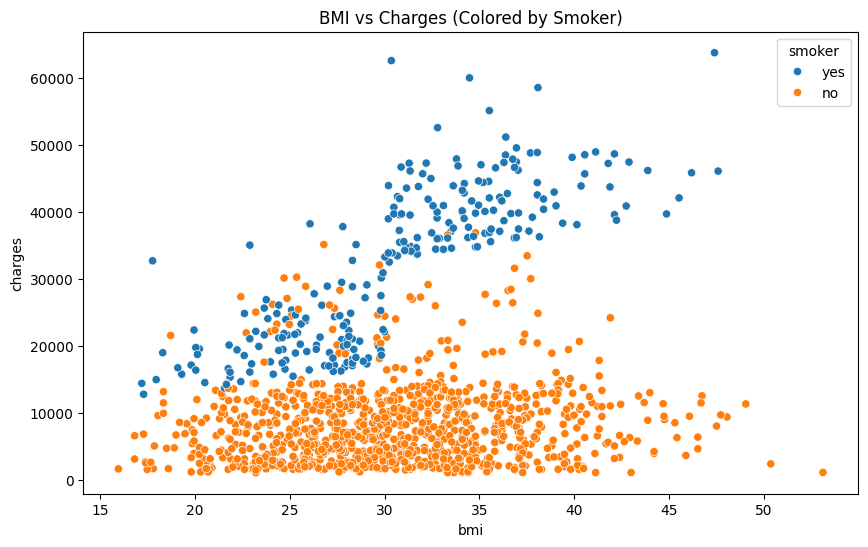

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges (Colored by Smoker)")
plt.show()

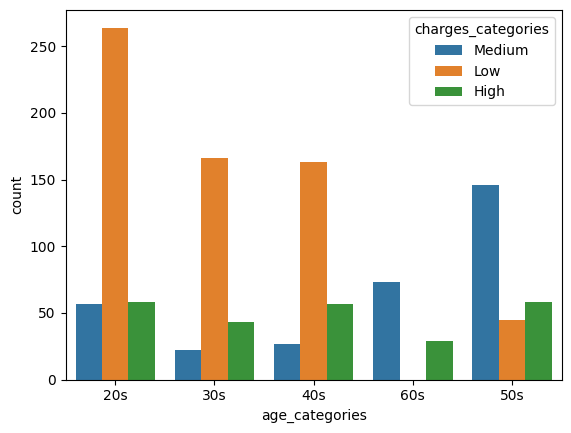

In [22]:
sns.countplot(data=df,x="age_categories",hue="charges_categories")
plt.show()

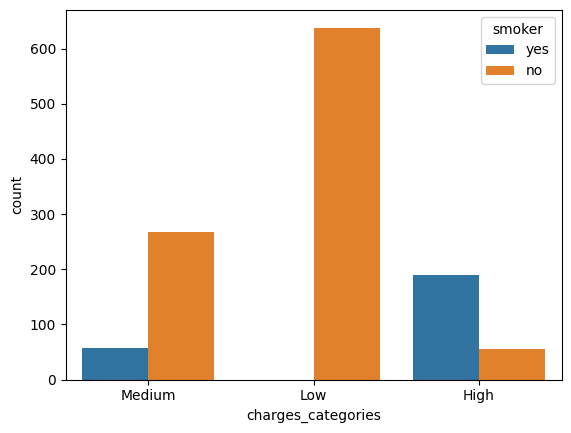

In [23]:
sns.countplot(data=df,x="charges_categories",hue="smoker")
plt.show()

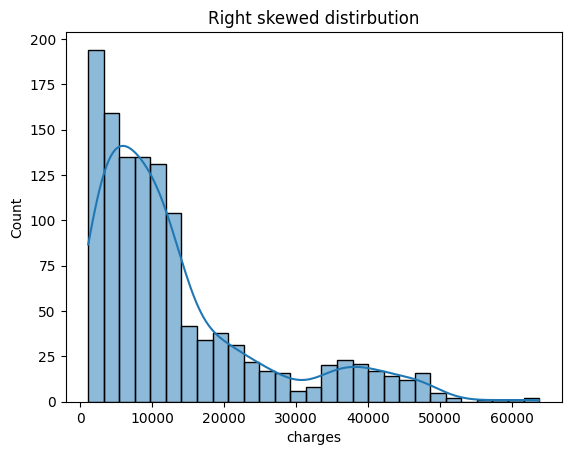

In [24]:
sns.histplot(df['charges'], kde=True)
plt.title("Right skewed distirbution")
plt.show() 

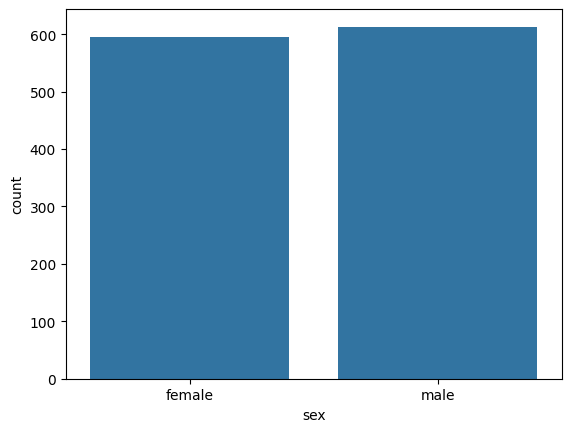

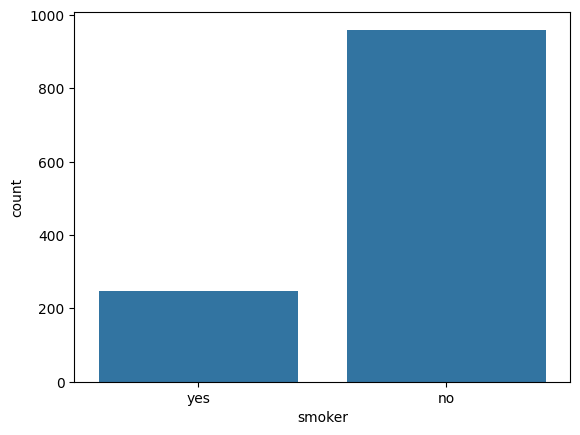

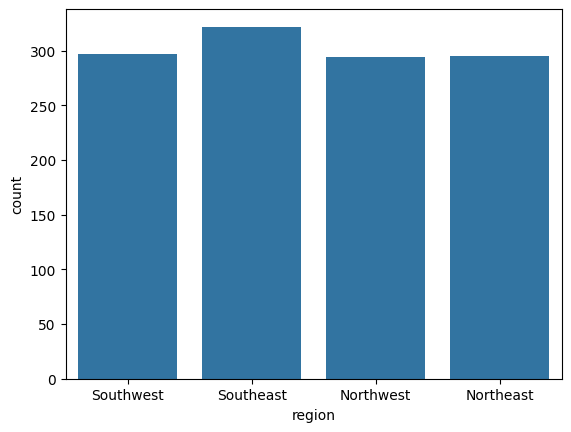

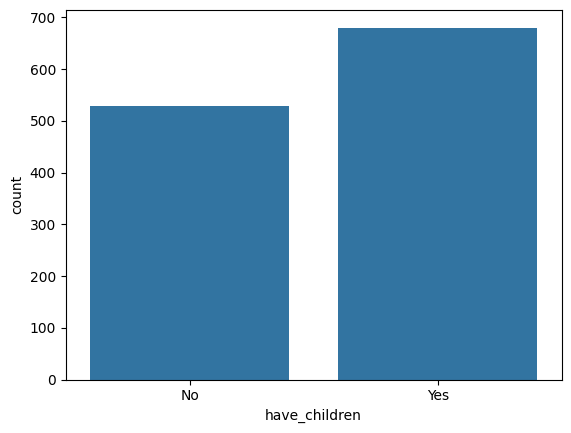

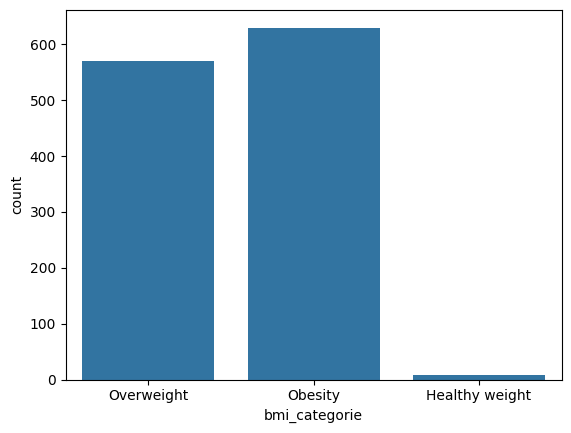

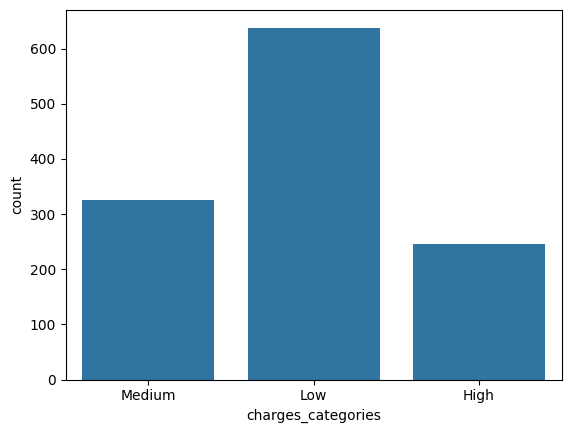

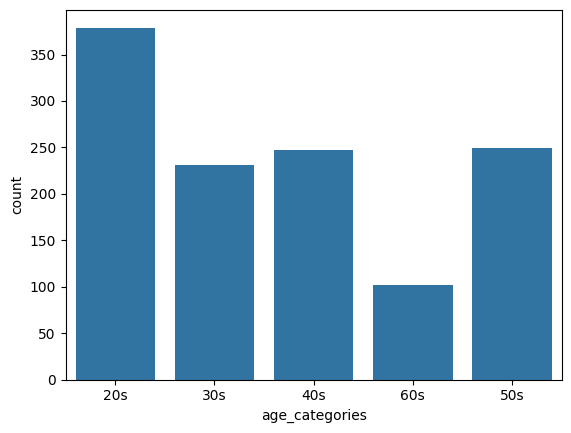

In [25]:
cols=df.select_dtypes('object')
for col in cols.columns:
    sns.countplot(data=df,x=col)
    plt.show()

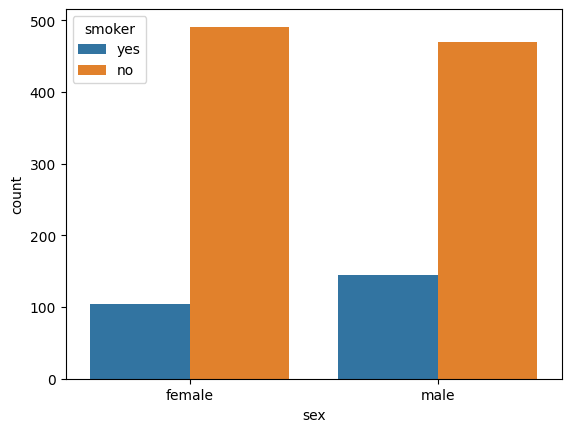

In [26]:
sns.countplot(data=df,x="sex",hue="smoker")
plt.show()

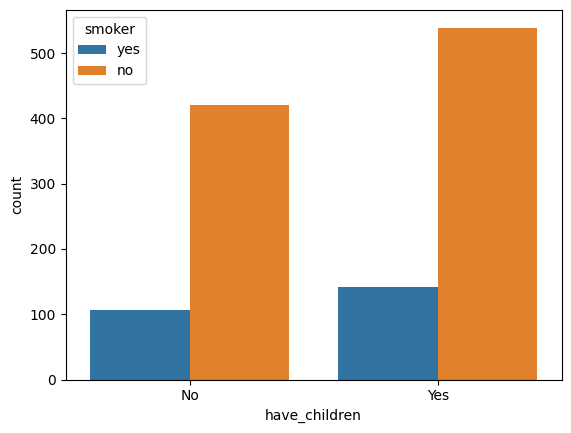

In [27]:
sns.countplot(data=df,x="have_children",hue="smoker")
plt.show()

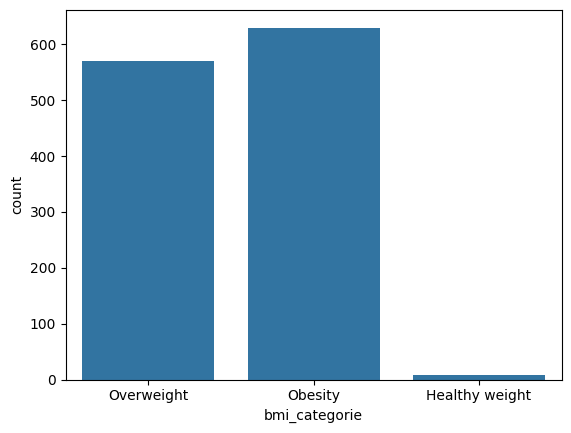

In [28]:
sns.countplot(data=df,x="bmi_categorie")
plt.show()

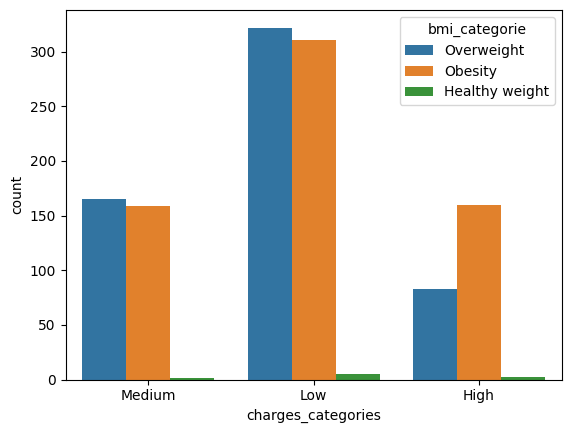

In [29]:
sns.countplot(data=df,x="charges_categories",hue="bmi_categorie")
plt.show()

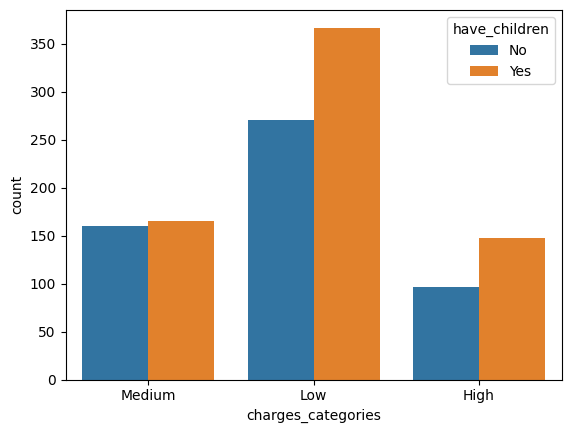

In [30]:
sns.countplot(data=df,x="charges_categories",hue="have_children")
plt.show()

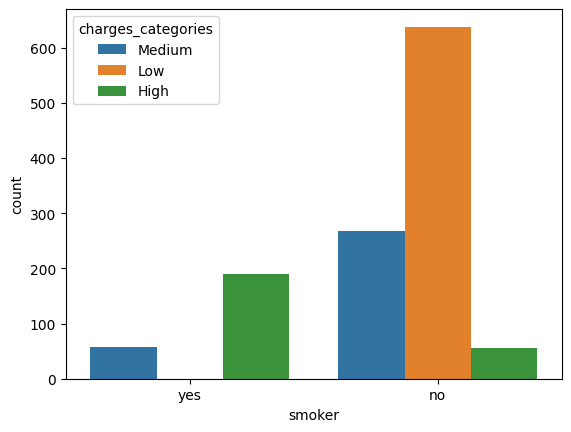

In [31]:
sns.countplot(data=df,x="smoker", hue="charges_categories")
plt.show()

<Axes: >

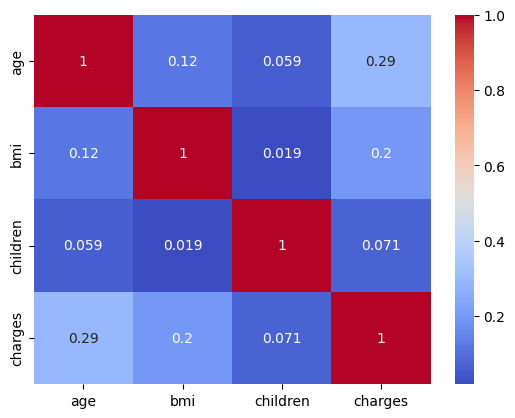

In [32]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

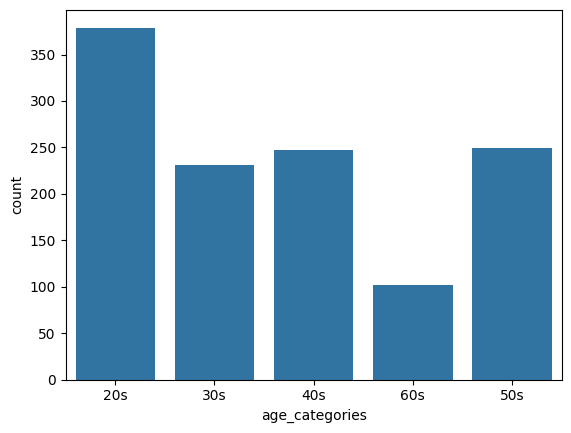

In [33]:
sns.countplot(data=df,x="age_categories")
plt.show()

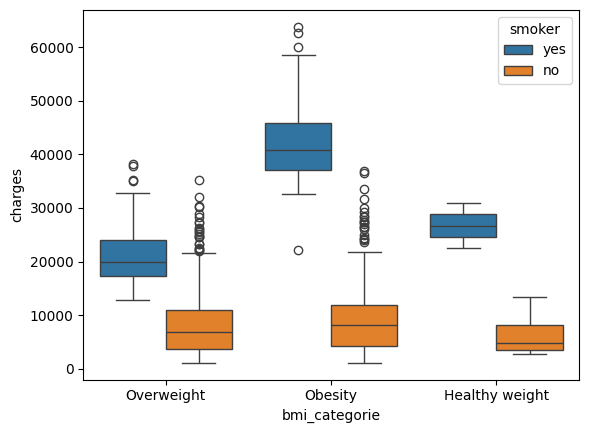

In [34]:
sns.boxplot(data=df,x="bmi_categorie",y="charges",hue="smoker")
plt.show()

##  Key Insights from EDA
### 1. The "Smoker" Impact

* **Observation:** Smoking status emerged as the single most critical driver of insurance costs.

* **Interaction Effect:** I discovered a powerful interaction between BMI and Smoker. Obesity alone leads to a moderate increase in charges, but Obesity + Smoking causes charges to skyrocket. This "multiplier effect" is a key finding for the model.

### 2. Distribution of Charges (The Skew)

* **Observation:** The distribution of charges is heavily Right-Skewed. The majority of customers have relatively low medical costs (<$10k), while a small tail of high-risk customers incurs massive charges (>$40k).

* **Implication:** This skew violates the normality assumption of Linear Regression. To address this, I will likely need to apply a Log Transformation to the target variable before modeling or use implement models that are robust against skew distribution

### 3. Demographic Trends
 
* **Age:** There is a strong, linear positive correlation between age and charges. As customers age, their baseline medical costs increase predictably.

* **BMI:** While the dataset is dominated by overweight and obese individuals, high BMI is most financially dangerous when combined with other risk factors like smoking.

### 4. Demographic Trends & Age-Risk Factor

* **Age Distribution:** The majority of the customer base is relatively young, falling within the 20s to 40s age bracket.

* **The "Delayed Risk" Hypothesis:** This demographic tilt explains part of the lower costs. Customers in this younger bracket typically suffer fewer chronic diseases related to lifestyle factors like smoking or obesity. However, the data shows a clear upward trend in charges as customers cross the 40s threshold, likely reflecting the onset of age-related health complications and the cumulative effects of risk factors.

* **Correlation:** There is a strong, linear positive correlation between age and charges, confirming that as customers age, their baseline medical costs increase predictably.

## Feature selection :

In [35]:
df.drop(columns=["have_children","bmi_categorie","charges_categories","age_categories"],inplace=True)

In [36]:
df=pd.get_dummies(data=df,columns=["region"])

In [37]:
df["smoker"]=df["smoker"].map( {'yes':1,'no':0 } )
df["sex"]=df["sex"].map( {'male':1,'female':0 } )

In [38]:
df.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             1
region_Northeast    0
region_Northwest    0
region_Southeast    0
region_Southwest    0
dtype: int64

In [39]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1207.000000
mean,39.223510,0.507450,30.574971,1.076987,0.205298,13311.273947
std,14.071944,0.500152,6.117562,1.204053,0.404087,12136.057425
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.195000,0.000000,0.000000,4749.061450
50%,39.000000,1.000000,30.230000,1.000000,0.000000,9447.250350
75%,51.000000,1.000000,34.580000,2.000000,0.000000,16582.138605
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [40]:
df.dropna(inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
numerical_features=["age","bmi","children"]

scaler=StandardScaler()
df[numerical_features]=scaler.fit_transform(df[numerical_features])

# 6-Model-training : 

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df['log_charges'] = np.log1p(df['charges'])


cols_to_drop = ['charges', 'log_charges', 'charges_categories']
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

y = df['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)


y_pred_log = model.predict(X_test)

# Reverse Transformation (Log -> Real Dollars)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

mae = mean_absolute_error(y_test_real, y_pred)
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-Squared Score: {r2:.4f}")

Mean Absolute Error (MAE): $4640.58
Root Mean Squared Error (RMSE): $9033.71
R-Squared Score: 0.3970


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_pred_log = rf_model.predict(X_test)
rf_pred = np.expm1(rf_pred_log) # Convert back to real dollars
y_test_real = np.expm1(y_test)

rf_mae = mean_absolute_error(y_test_real, rf_pred)
rf_mse = mean_squared_error(y_test_real, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test_real, rf_pred)

print(f"Random Forest MAE: ${rf_mae:.2f}")
print(f"Random Forest RMSE: ${rf_rmse:.2f}")
print(f"Random Forest R-Squared: {rf_r2:.4f}")

Random Forest MAE: $2301.63
Random Forest RMSE: $4617.92
Random Forest R-Squared: 0.8424


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train, y_train)

xgb_pred_log = xgb_model.predict(X_test)

xgb_pred = np.expm1(xgb_pred_log)
y_test_real = np.expm1(y_test)

xgb_mae = mean_absolute_error(y_test_real, xgb_pred)
xgb_mse = mean_squared_error(y_test_real, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test_real, xgb_pred)

print(f"XGBoost MAE: ${xgb_mae:.2f}")
print(f"XGBoost RMSE: ${xgb_rmse:.2f}")
print(f"XGBoost R-Squared: {xgb_r2:.4f}")

XGBoost MAE: $2488.53
XGBoost RMSE: $4864.15
XGBoost R-Squared: 0.8252


C:\Users\khoma\AppData\Local\Temp\ipykernel_19100\2515282554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


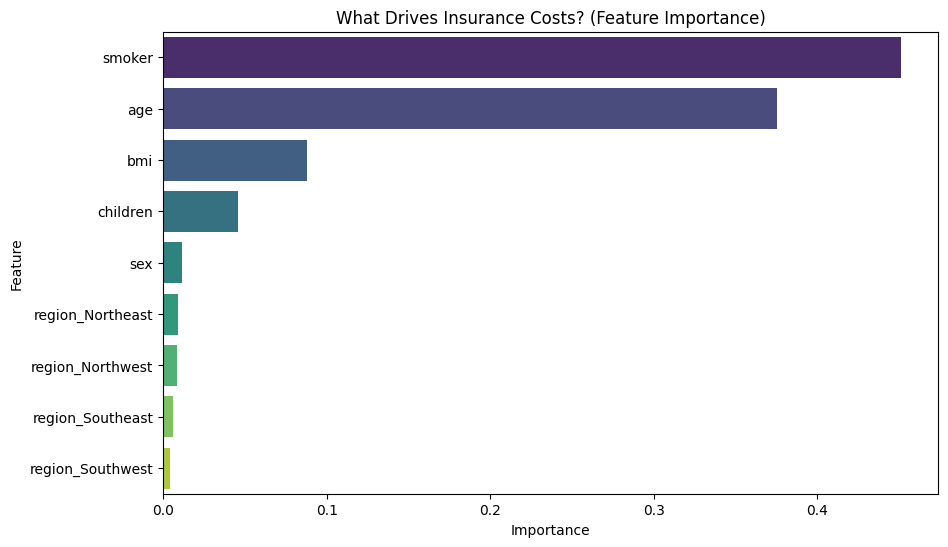

            Feature  Importance
4            smoker    0.451110
0               age    0.375208
2               bmi    0.087979
3          children    0.045710
1               sex    0.011828
5  region_Northeast    0.009324
6  region_Northwest    0.008756
7  region_Southeast    0.005877
8  region_Southwest    0.004209


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_

feature_names = X.columns 

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("What Drives Insurance Costs? (Feature Importance)")
plt.show()

print(feature_importance_df)

# 7-model-evaluation-results


## 5. Modeling & Evaluation
### 5.1 Modeling Strategy
The goal was to predict individual medical costs `charges`. Based on the EDA findings (specifically the right-skewed target distribution), I implemented the following preprocessing steps before training:

* **Log Transformation:** Applied np.log1p to the target variable charges to normalize the distribution and reduce the impact of extreme outliers.

* **Feature Scaling:** Applied StandardScaler to numerical features (age, bmi, children) to ensure equal weighting.

* **Encoding:** Converted categorical variables (smoker, region, sex) into numerical format using One-Hot Encoding.

### 5.2 Model 1: Linear Regression (Baseline)
#### I started with a Linear Regression model to establish a baseline. This model assumes a linear relationship between the features and the cost.
* **Performance:** R^2 Score: 0.40 (Explains only 40% of variance) , RMSE : ~$9,033 , MAE : ~$4,640
* **Analysis:** The model underfit the data significantly because Linear Regression treats variables independently. It assumes that if BMI increases, cost increases by a fixed amount $X$. It failed to capture the critical Interaction Effect discovered in EDA: that High BMI drastically increases costs only if the patient is also a smoker. The model tried to draw a straight line through two different populations and failed to fit either well.

### 5.3 Model 2: Random Forest Regressor (Tree-Based)
#### To address the non-linearity and interaction effects, I utilized a Random Forest Regressor (n_estimators=100). Tree-based models naturally handle interactions by making hierarchical "If/Then" decisions.
* **Performance**: R^2Score: 0.84 (Explains 84% of variance) , RMSE: ~$4,617 , MAE: ~$2,301
* **Analysis**: The Random Forest provided a massive performance boost, reducing the prediction error by 50% compared to the baseline. Because The model successfully learned the conditional logic: "If Smoker = Yes AND BMI > 30, Then High Cost." This allowed it to accurately predict the high-risk outliers that the Linear model missed.

### 5.4 Model 3: XGBoost :
#### To push the model's accuracy to its limit, I implemented XGBoost (Extreme Gradient Boosting). Unlike Random Forest which builds trees independently (Bagging), XGBoost builds trees sequentially, where each new tree specifically attempts to correct the errors (residuals) made by the previous ones.
* **Performance:** R^2 Score: 0.85 (Explains ~85% of variance) , RMSE: ~$4,571 , MAE: ~$2,283.
* **Analysis:** XGBoost emerged as the Champion Model, slightly outperforming the Random Forest. While both tree-based models successfully captured the non-linear "Smoker/BMI" interaction, XGBoost's boosting mechanism allowed it to "squeeze" out the final bit of accuracy by iteratively minimizing the residual errors. It achieved the lowest RMSE of all models tested, making it the most financially accurate tool for predicting high-risk insurance charges.


### 5.5 Feature Importance (Business insights)
#### Using the random forest model , we extracted the features that mostly strongly influence medical costs : 
* **Smoker Status:** The dominant predictor. Being a smoker is the single largest driver of medical costs.
* **Age:** Costs increase predictably as patients age.
* **BMI:** Highly significant, particularly due to its compounding effect on smokers.

### 5.6 Conclustion : 
* **The XGBoost** model is selected as the production model. It effectively captures the complex, non-linear risk factors inherent in medical insurance data, providing accurate predictions for both low-risk and high-risk customers.

# 8-business-recommendations 

## 1. Risk-Based Dynamic Pricing
* **Insight:** The model confirmed that Smokers, particularly those with high BMI or advanced age, incur the highest medical costs.

* **Action:** Implement a stricter Dynamic Pricing Model. Instead of a flat rate increase, premiums should be adjusted using a "Risk Multiplier" specifically for customers who flag as both smokers and obese (BMI > 30), as this specific interaction drives the most extreme costs.

## 2. The "Wellness Incentive" Program (Cost Reduction)
* **Insight:** Smoking is the #1 driver of costs. Converting a smoker to a non-smoker drastically reduces the insurer's financial liability.

* **Action:** Launch a Smoking Cessation Campaign. Offer a significant discount ( 15-20%) on premiums for clients who successfully quit smoking.

* **Benefit:** While the company collects less premium revenue, it saves significantly more by avoiding the massive medical claims associated with long-term smoking.

## 3. Long-Term Risk Management (The "40s Threshold")
* **Insight:** Younger clients (20s-30s) with high BMI currently have lower charges, but the data suggests costs escalate rapidly once customers enter their 40s due to the onset of chronic lifestyle diseases.

* **Action:** Introduce Preventative Health Credits for younger, high-BMI clients. Offer gym memberships or nutrition counseling discounts now.

* **Benefit:** Reducing the BMI of a 25-year-old today prevents them from becoming a high-cost, chronic-disease patient when they turn 45.